In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from opm import util

In [2]:
import sqlite3
conn = sqlite3.connect('sqlite-database.db')
commits = pd.read_sql_query("SELECT * from git_commit", conn)
commits.committertime = pd.to_datetime(commits.committertime * 1000000000, utc = True)
commits.authortime = pd.to_datetime(commits.authortime * 1000000000, utc = True)


In [3]:
a = commits[["authortime"]].groupby([commits.authortime.dt.strftime('%Y'),commits.authortime.dt.strftime('%m')]).count()
a.columns = ["count"]
a.index.names = ["year","month"]
a = a.reset_index()
a = a.pivot(index="year",columns="month",values="count")
a = a.fillna(0)

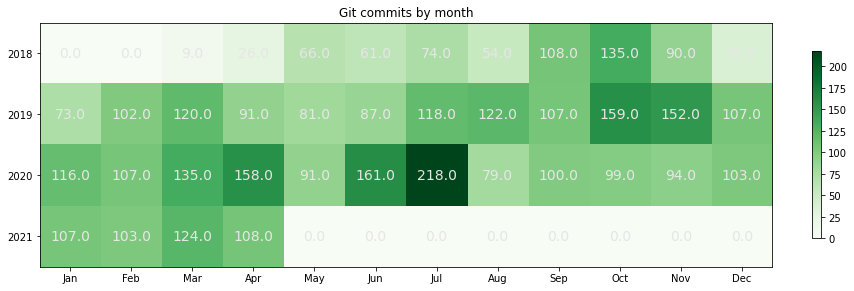

In [4]:
commits
pivot = util.create_pivot(commits,"authortime", "hash", "count")
util.create_mosaic(pivot,"Greens")
plt.title("Git commits by month")
plt.show()


In [5]:
a = commits[["authortime"]].groupby([commits.authortime.dt.strftime('%A'),commits.authortime.dt.strftime('%H')]).count()
a.columns = ["count"]
a.index.names = ["day","hour"]
a = a.reset_index()
a = a.pivot(index="day",columns="hour",values="count")
a = a.fillna(0)
a = a.reindex(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])


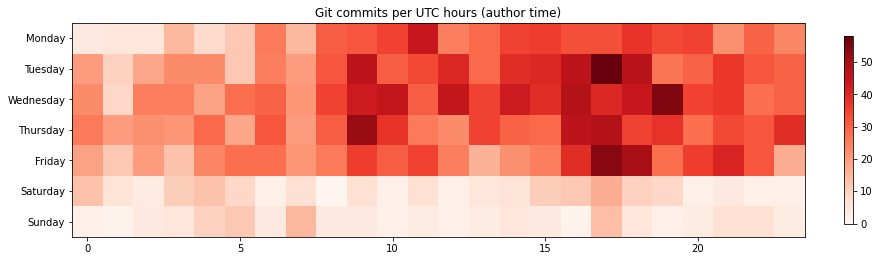

In [6]:
plt.figure(figsize=(14,11))
im = plt.imshow(a, cmap="Reds")
plt.yticks(range(len(a)),a.index.values)
plt.title("Git commits per UTC hours (author time)")
plt.colorbar(im, fraction=0.012)
plt.show()


In [7]:
import numpy as np
tz = pd.DataFrame(index=pd.Index(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"], name="day"))
zones = []
for offset in range(0,24):
   for hour in range(0,24):
       if (hour - offset < 8 and hour - offset >= 0):
          tz["%02d" % hour] = np.array([1,1,1,1,1,0,0])
       elif offset + 8 > 24 and hour < offset + 8  - 24:
            tz["%02d" % hour] = np.array([0,1,1,1,1,1,0])   
       else:
          tz["%02d" % hour] = np.array([0,0,0,0,0,0,0])
   zones.append(a.multiply(tz).sum().sum())
tz.columns.name = "hour"

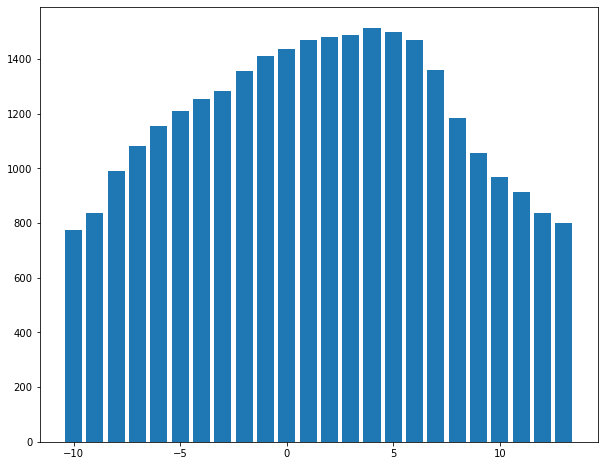

In [8]:
plt.figure(figsize=(10,8))
plt.bar([x for x in range(-10,14)],zones)
plt.show()